In [1]:
from pymlutil.functions import *
from pymlutil.jsonutil import cmd, ReadDict, WriteDict
from pymlutil.version import VersionString
from pymlutil.s3 import s3store, Connect
import torch
from matplotlib import pyplot as plt

### jsonutil
**ReadDict** returns a python dictionary from a json or yaml dictionary

In [2]:
dict = ReadDict('test.yaml')
dict['test_yaml']

[{'zero': 0}, {'one': 1}, {'two': 2}]

**cmd** executes shell commands and displays the result in the console

In [3]:
cmd('ls -la')

$ ls -la
total 136
drwxrwxr-x 11 blarson blarson  4096 Oct 14 22:02 .
drwxrwxr-x 11 blarson blarson  4096 Sep 15 10:42 ..
drwxrwxr-x  4 blarson blarson  4096 Aug 12 16:37 build
-rw-rw-r--  1 blarson blarson  1060 Aug 12 16:57 creds.yaml
-rwxrwxr-x  1 blarson blarson  4107 Aug 12 17:24 deploy
drwxrwxr-x  2 blarson blarson  4096 Sep 19 14:14 dist
drwxrwxr-x  8 blarson blarson  4096 Sep 19 14:14 .git
-rw-rw-r--  1 blarson blarson  1819 Aug  8 17:00 .gitignore
drwxrwxr-x  2 blarson blarson  4096 Aug  8 17:00 img
drwxrwxr-x  2 blarson blarson  4096 Oct 14 22:02 .ipynb_checkpoints
-rwxrwxrwx  1 blarson blarson   110 Oct 14 22:00 lab
-rw-rw-r--  1 blarson blarson 11357 Aug  8 17:00 LICENSE
drwxrwxr-x  3 blarson blarson  4096 Aug 11 08:16 pymlutil
drwxrwxr-x  2 blarson blarson  4096 Sep 19 14:14 pymlutil.egg-info
-rw-rw-r--  1 blarson blarson 48778 Aug  8 17:00 pymlutil.ipynb
-rw-rw-r--  1 blarson blarson  1580 Aug 12 17:03 README.md
-rw-rw-r--  1 blarson blarson  1279 Aug  8 17:00 setup.py
dr

(0, None, None)

 4 blarson blarson  4096 Aug 11 21:10 tests
-rw-rw-r--  1 blarson blarson   231 Aug  8 17:00 test.yaml
drwxrwxr-x  2 blarson blarson  4096 Aug 12 16:40 .vscode


### functions
**GaussianBasis** computes a unit height gaussian bell curve function
$$ GaussianBasis(x, zero, sigma) = e^{-\frac{(x-zero)^2}{2*sigma^2}} $$
- x : function input
- zero : location of the peak center
- sigma: curve with or standard deviation

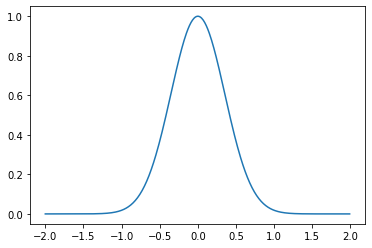

In [19]:
x = np.arange(-2.0, 2.0, 0.01) 
y = GaussianBasis(torch.tensor(x),sigma=0.5)
plt.plot(x, y)
plt.show()

**Sigmoid** computes a sigmoid function
scale/(1.0+np.exp(-1*k_exp*(x-offset)))
$$ Sigmoid(x, scale = 1.0, offset=0.0, k\_exp = 5.0) = \frac{scale} {1+e^{-k\_exp (x-offset)}} $$
- **x:** function input
- **scale:** location of the peak center
- **exp:** curve with or standard deviation
- **maxscale:** curve with or standard deviation


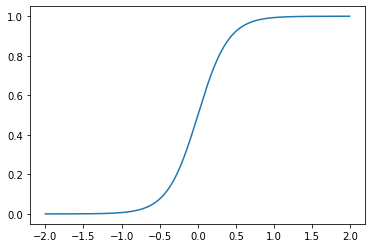

In [5]:
from pymlutil.functions import Sigmoid
x = np.arange(-2.0, 2.0, 0.01) 
y = Sigmoid(x, scale = 1.0, offset=0.0, k_exp = 5.0)
plt.plot(x, y)
plt.show()

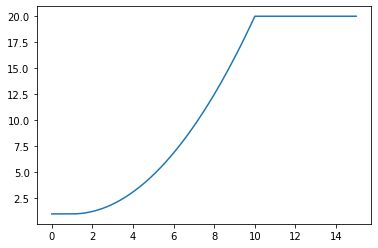

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from pymlutil.functions import Exponential, GaussianBasis


vx = 1.0
vy = 1.0
px = 10.0
py = 20.0
power=2

expf =  Exponential(vx=vx, vy=vy, px=px, py=py, power=power)

x = np.arange(0, px+5, 0.01)
plt.plot(x, expf.f(x))
plt.show()

## S3
The pymutil s3 module provides an interface on top of the python minio library.  Class functions include
- __init__: managing urllib3 certificate and timeout paraemeters for connection to https and http endpoints
- PutDir: write local directory to object storage
- GetDir: 

In [7]:
credentials = "creds.yaml"
s3, creds, s3def = Connect(credentials)
s3def

{'name': 'store',
 'type': 'trainer',
 'address': '198.211.145.1:30990',
 'tls': False,
 'sets': {'dataset': {'bucket': 'mllib',
   'prefix': 'data',
   'dataset_filter': ''},
  'trainingset': {'bucket': 'mllib',
   'prefix': 'training',
   'dataset_filter': ''},
  'model': {'bucket': 'mllib', 'prefix': 'model', 'dataset_filter': ''},
  'test': {'bucket': 'mllib', 'prefix': 'test', 'dataset_filter': ''}}}

In [8]:
dest = '{}/{}'.format(s3def['sets']['dataset']['prefix'], 'testimages')
s3.PutDir(s3def['sets']['dataset']['bucket'], 'dataset', dest)

PutDir: 0it [00:00, ?it/s]


True

pymlutil provides exposes a module command line interface to the following functions

'''cmd
python3 -m pymlutil -p -src tests/testimages -set dataset -dest testimages
'''

In [9]:
! python3 -m pymlutil -p -src tests/testimages -set test -dest notebook/testimageg

Traceback (most recent call last):
  File "/usr/lib/python3.8/runpy.py", line 185, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/usr/lib/python3.8/runpy.py", line 144, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "/usr/lib/python3.8/runpy.py", line 155, in _get_module_details
    code = loader.get_code(mod_name)
  File "<frozen importlib._bootstrap_external>", line 981, in get_code
  File "<frozen importlib._bootstrap_external>", line 911, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/data/git/pymlutil/pymlutil/__main__.py", line 30
    parser.add_argument('--version_str', '-v' type=str, default=None, help='version in config file')
                                              ^
SyntaxError: invalid syntax


s3.GitDir copies an S3 path and all sub-objects to a directory from python or command line as follows:

In [10]:
import tempfile
with tempfile.TemporaryDirectory() as tmpdirname:
    s3.GetDir(s3def['sets']['dataset']['bucket'], dest, tmpdirname)

In [11]:
! python3 -m pymlutil -g -src notebook/testimage -set test -dest tests/notebook/testgitdir

Traceback (most recent call last):
  File "/usr/lib/python3.8/runpy.py", line 185, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/usr/lib/python3.8/runpy.py", line 144, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "/usr/lib/python3.8/runpy.py", line 155, in _get_module_details
    code = loader.get_code(mod_name)
  File "<frozen importlib._bootstrap_external>", line 981, in get_code
  File "<frozen importlib._bootstrap_external>", line 911, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/data/git/pymlutil/pymlutil/__main__.py", line 30
    parser.add_argument('--version_str', '-v' type=str, default=None, help='version in config file')
                                              ^
SyntaxError: invalid syntax


The python module -clone parameter copies data from one S3 to another

ssh port forwarding:
```cmd
ssh -L 29990:ai2.cbd:30990 ai@ai2.cbd
```

```yaml
s3:
- name: store
  type: trainer
  address: 10.180.68.235:31994
  access key: <access key>
  secret key: <secret key>
  tls: false
  cert verify: false
  cert path: null
  sets:
    dataset: {"bucket":"annotations","prefix":"", "dataset_filter":"" }
    trainingset: {"bucket":"trainingset","prefix":"", "dataset_filter":"" }
    model: {"bucket":"savedmodel","prefix":"", "dataset_filter":"" }
    test: {"bucket":"test","prefix":"", "dataset_filter":"" }
- name: ai2
  type: trainer
  address: 127.0.0.1:29990
  access key: <access key>
  secret key: <secret key>
  tls: false
  cert verify: false
  cert path: null
  sets:
    dataset: {"bucket":"imgml","prefix":"data", "dataset_filter":"" }
    trainingset: {"bucket":"imgml","prefix":"training", "dataset_filter":"" }
    model: {"bucket":"imgml","prefix":"model", "dataset_filter":"" }
    test: {"bucket":"imgml","prefix":"test", "dataset_filter":"" }
```

In [12]:
! python3 -m pymlutil -clone -srcS3 store -destS3 ai2 -src "" -dest lit

Traceback (most recent call last):
  File "/usr/lib/python3.8/runpy.py", line 185, in _run_module_as_main
    mod_name, mod_spec, code = _get_module_details(mod_name, _Error)
  File "/usr/lib/python3.8/runpy.py", line 144, in _get_module_details
    return _get_module_details(pkg_main_name, error)
  File "/usr/lib/python3.8/runpy.py", line 155, in _get_module_details
    code = loader.get_code(mod_name)
  File "<frozen importlib._bootstrap_external>", line 981, in get_code
  File "<frozen importlib._bootstrap_external>", line 911, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/data/git/pymlutil/pymlutil/__main__.py", line 30
    parser.add_argument('--version_str', '-v' type=str, default=None, help='version in config file')
                                              ^
SyntaxError: invalid syntax
